In [4]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os
import sys

## Image feature extraction and comparison
Yixuan Wang 530634085
#### Proble: simple grayscale thresholding cannot be applied to real-world image with various backgrounds.
#### This note book aims to denoise hand images to naive binary images
#### Techniques used in this work: hsv conversion, Ycbcr conversion, Ostu thresholding, adaptive thresholding
#### In general, cb/cr has good performance in image denoising and  edge detecting.Otsu thresholding effectively transforms the image into the binary format. This combination can be considered as a potential solution in this project
#### After this step, we will start process the binary image, extract contours and conduct calculations.



In [5]:
path = "images/image2.jpg"
# path = "images/test1.jpg"
img=cv2.imread(path)


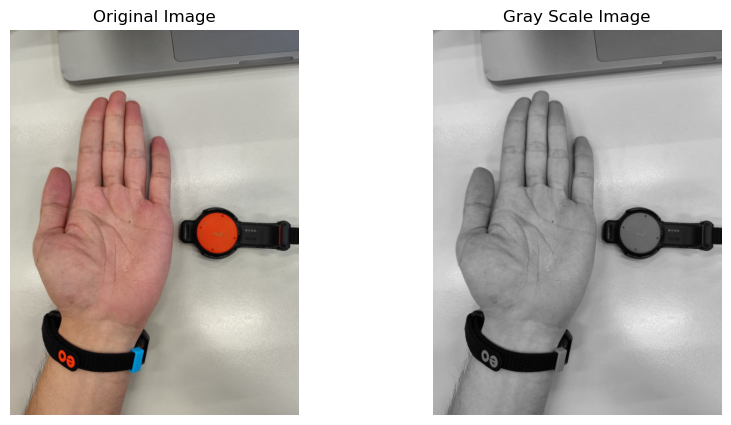

In [6]:
gray_scale=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
ax[0].set_title("Original Image")
ax[0].axis("off")

ax[1].imshow(gray_scale, cmap="gray")
ax[1].set_title("Gray Scale Image")
ax[1].axis("off")
plt.show()

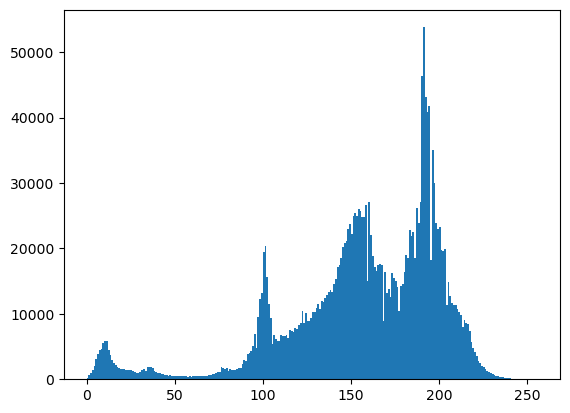

In [7]:
# show the histogram of the gray scale image
plt.hist(gray_scale.ravel(), 256, [0, 256])
plt.show()

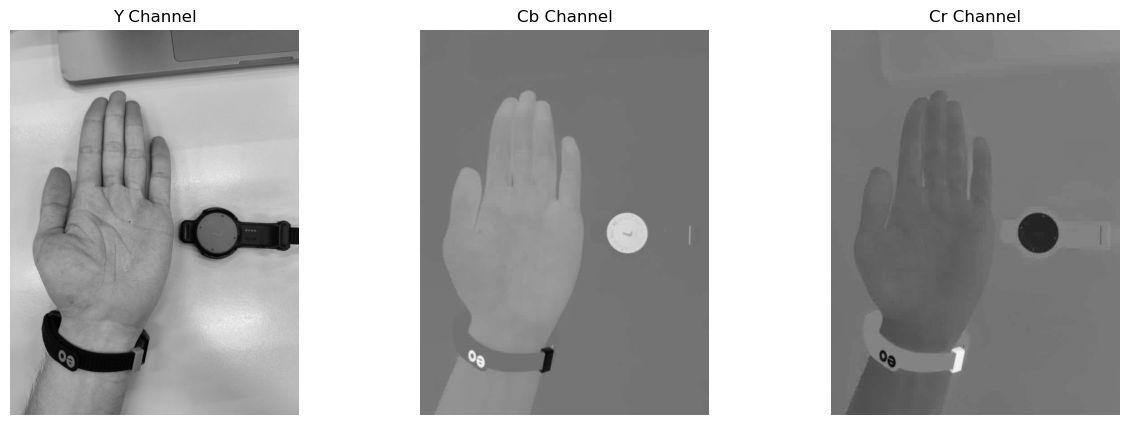

In [8]:
# YCbCr color space，display the Y, Cb, Cr channels
ycbcr=cv2.cvtColor(img, cv2.COLOR_BGR2YCrCb)

fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].imshow(ycbcr[:,:,0], cmap="gray")
ax[0].set_title("Y Channel")
ax[0].axis("off")

ax[1].imshow(ycbcr[:,:,1], cmap="gray")
ax[1].set_title("Cb Channel")
ax[1].axis("off")

ax[2].imshow(ycbcr[:,:,2], cmap="gray")
ax[2].set_title("Cr Channel")
ax[2].axis("off")

plt.show()

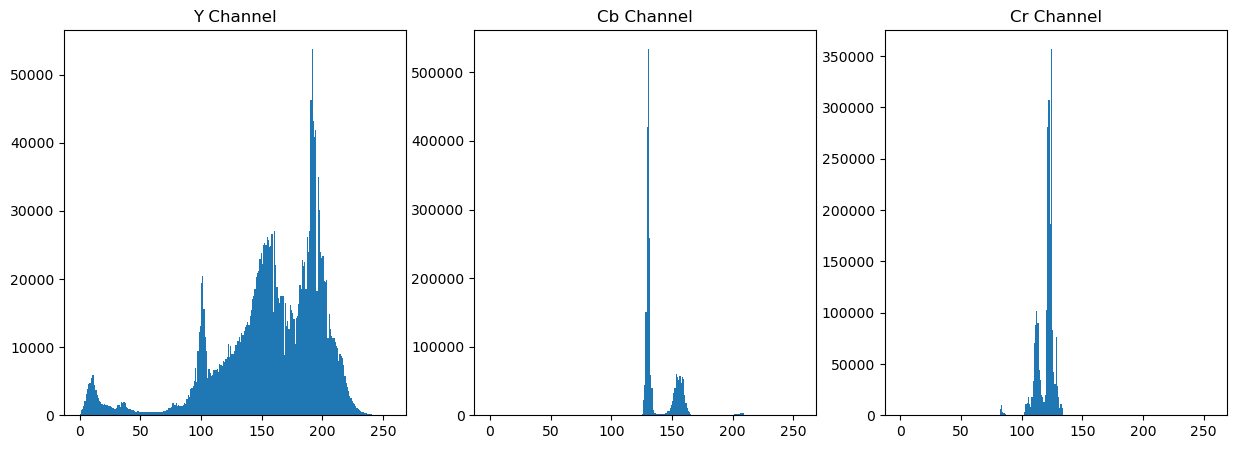

In [9]:
# display the three histogram of the ycbcr image
y, cb, cr = cv2.split(ycbcr)
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].hist(y.ravel(), 256, [0, 256])
ax[0].set_title("Y Channel")
ax[1].hist(cb.ravel(), 256, [0, 256])
ax[1].set_title("Cb Channel")
ax[2].hist(cr.ravel(), 256, [0, 256])
ax[2].set_title("Cr Channel")
plt.show()

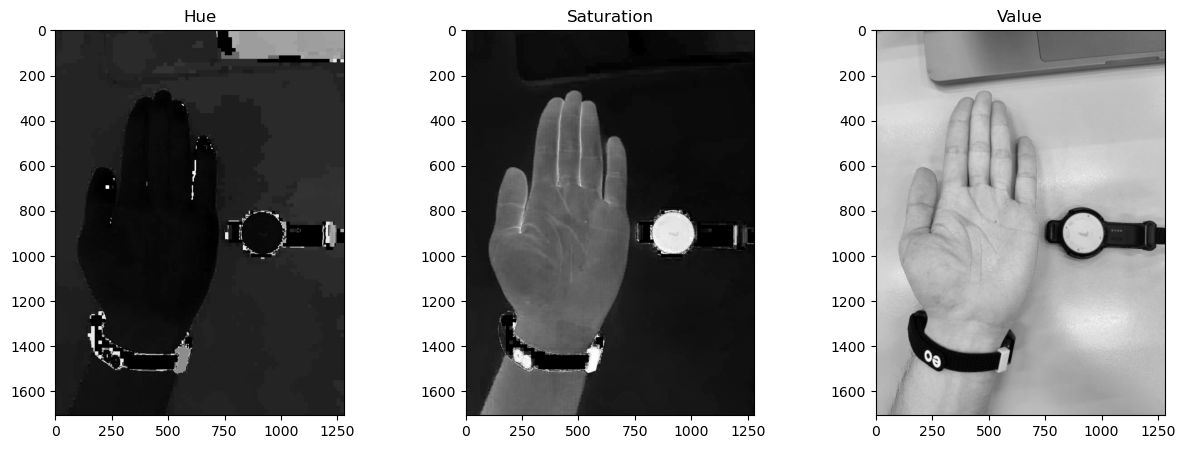

In [10]:
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
hsv.shape
# visulaize it in three channels
h, s, v = cv2.split(hsv)
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].imshow(h, cmap='gray')
ax[0].set_title('Hue')
ax[1].imshow(s, cmap='gray')
ax[1].set_title('Saturation')
ax[2].imshow(v, cmap='gray')
ax[2].set_title('Value')
plt.show()


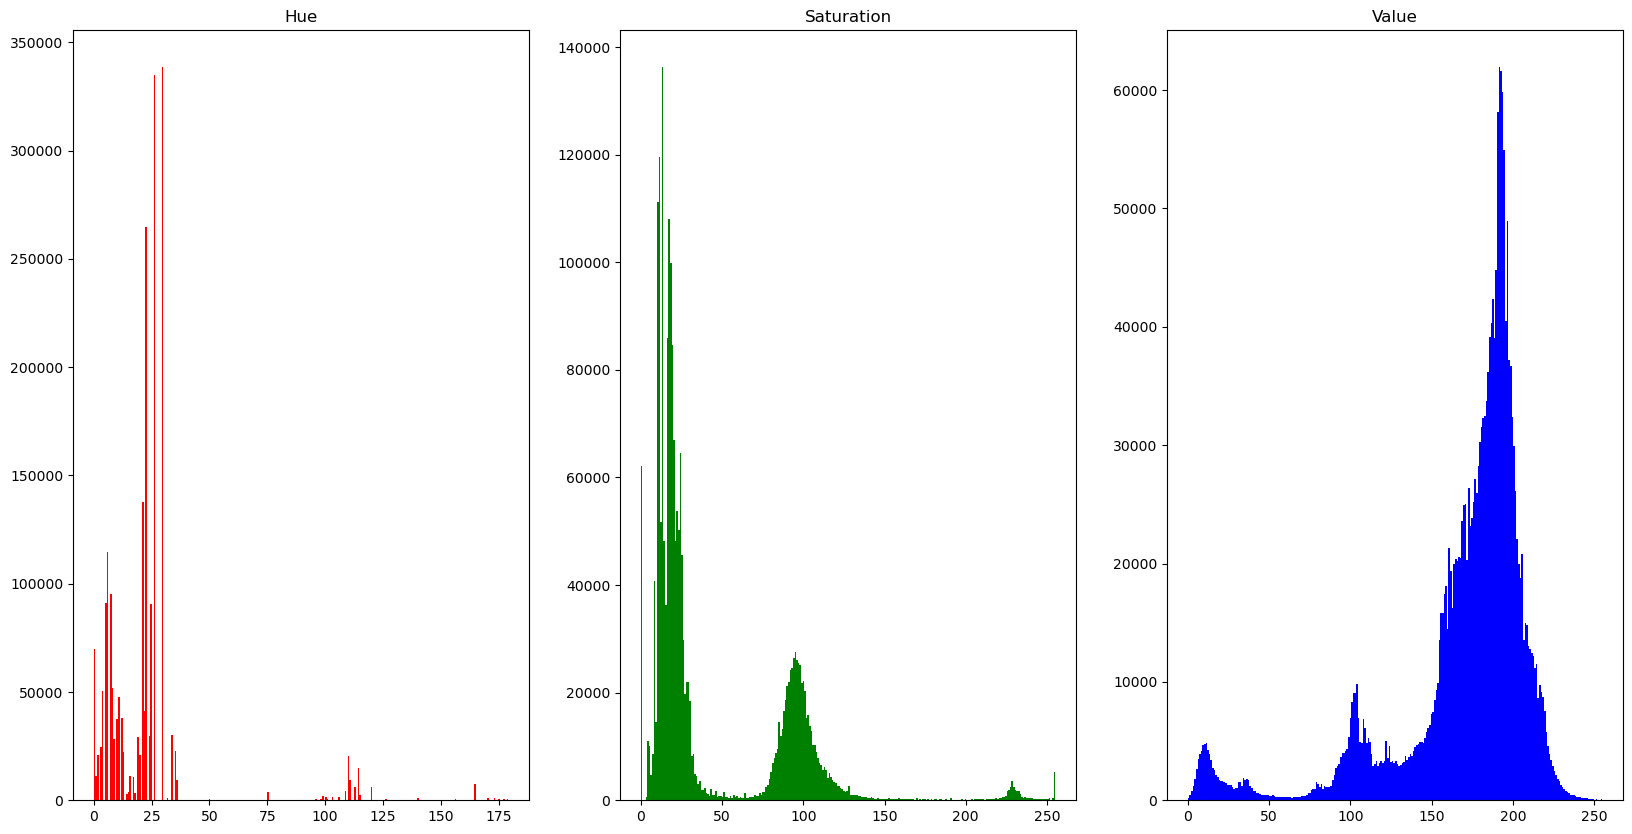

In [11]:
# show the histogram of hsv image in three channels
fig, ax = plt.subplots(1, 3, figsize=(20, 10))
ax[0].hist(h.ravel(), bins=256, color='red')
ax[0].set_title('Hue')
ax[1].hist(s.ravel(), bins=256, color='green')
ax[1].set_title('Saturation')
ax[2].hist(v.ravel(), bins=256, color='blue')
ax[2].set_title('Value')
plt.show()

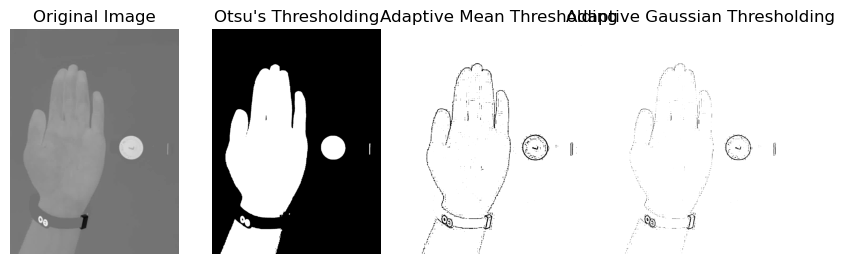

In [12]:
# apply otsu's thresholding
target_channel=cb
ret, thresh1 = cv2.threshold(target_channel, 120, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)  
# apply adaptive thresholding
thresh2 = cv2.adaptiveThreshold(target_channel, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2)
thresh3 = cv2.adaptiveThreshold(target_channel, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)


fig, ax = plt.subplots(1, 4, figsize=(10, 5))
ax[0].imshow(target_channel, cmap="gray")
ax[0].set_title("Original Image")
ax[0].axis("off")

ax[1].imshow(thresh1, cmap="gray")
ax[1].set_title("Otsu's Thresholding")
ax[1].axis("off")

ax[2].imshow(thresh2, cmap="gray")
ax[2].set_title("Adaptive Mean Thresholding")
ax[2].axis("off")

ax[3].imshow(thresh3, cmap="gray")
ax[3].set_title("Adaptive Gaussian Thresholding")
ax[3].axis("off")

plt.show()




In [20]:
from imutils import grab_contours
import imutils

In [55]:
def is_circle(contour, epsilon=0.1):
    area = cv2.contourArea(contour)
    if area == 0:
        return False
    ((x, y), radius) = cv2.minEnclosingCircle(contour)
    circle_area = np.pi * (radius ** 2)
    print(f"Area: {area}, Circle Area: {circle_area}")
    return abs(area - circle_area) / circle_area < epsilon


Found 7 contours
Area: 81628.5, Circle Area: 196001.00265065517
Area: 3366.5, Circle Area: 7270.4604631899665
Area: 17.5, Circle Area: 51.053417158319675
Area: 61.0, Circle Area: 102.10535040186835
Area: 531.5, Circle Area: 5811.973446114447
Area: 26325.5, Circle Area: 27541.846806407968
Area: 487282.0, Circle Area: 1051564.1548736617
there are 2 contours
The pixel area of the hand is: 487282.0
The pixel area of the circle is: 26325.5


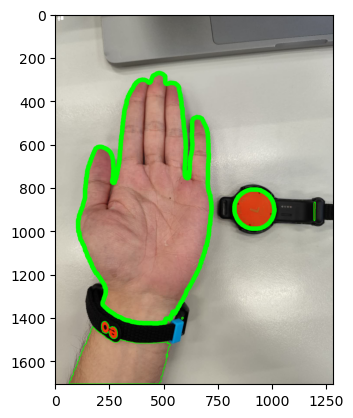

In [62]:
CNTS=cv2.findContours(thresh1, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
CNTS=grab_contours(CNTS)
print("Found {} contours".format(len(CNTS)))

hand = max(CNTS, key=cv2.contourArea)
circle=[cnt for cnt in CNTS if is_circle(cnt)]

target=[hand] + list(circle)
print("there are {} contours".format(len(target)))
print("The pixel area of the hand is: {}".format(cv2.contourArea(hand)))
print("The pixel area of the circle is: {}".format(cv2.contourArea(circle[0])))
cv2.drawContours(img, target, -1, (0, 255, 0), 20)

# draw the contour on the threshold image
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [66]:
def calculate_hand_area(hand,reference):
    actual_area=2.5*2.5*3.14
    pixel_ratio=actual_area/cv2.contourArea(reference)
    return cv2.contourArea(hand)*pixel_ratio

hand_area=calculate_hand_area(hand,circle[0])

print("The actual area of the hand is: {} squared centimeters".format(hand_area))

The actual area of the hand is: 363.25650984786614 squared centimeters
